<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/3%20Aprendizaje%20profundo%20(II)/Sesion%202/cnn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [2]:
input_1d = torch.randn(10, dtype=torch.float)
input_2d = torch.randn(2,5, dtype=torch.float)
input_2d_img = torch.randn(3, 10, 3, dtype=torch.float)

In [3]:
input_2d_img

tensor([[[ 0.5195, -0.1711,  0.5969],
         [ 0.9062, -2.4171,  0.0238],
         [ 1.0271, -1.4922,  0.0559],
         [ 1.2680, -1.4272, -0.6667],
         [-1.1467,  0.4410, -0.1610],
         [-0.3196, -1.0356, -0.4848],
         [ 2.0695, -0.4047,  0.5028],
         [ 0.3343,  0.7310,  1.5320],
         [ 1.1636,  0.7997, -0.3871],
         [ 0.5816, -0.5731,  0.4139]],

        [[-1.6657, -0.9579,  1.5706],
         [ 1.3050,  0.3626, -1.2140],
         [ 0.8365,  0.1244,  1.0164],
         [ 0.9444, -0.7130,  0.4535],
         [ 2.2395,  2.1042,  0.3904],
         [ 1.8754, -0.1293,  0.8909],
         [-0.2177,  0.4149,  0.2269],
         [-0.2074, -1.3316,  0.6020],
         [-1.8794,  0.9597, -0.2987],
         [ 0.5174,  0.7474, -1.8351]],

        [[-0.2816, -0.2430, -0.4722],
         [-2.4882, -1.1090,  0.9332],
         [-1.4173,  1.5437, -0.1800],
         [ 0.0840, -1.1888, -0.0872],
         [-0.5138, -1.5388, -0.9161],
         [ 0.7086,  1.4258, -0.7066],
        

In [4]:
## -- CONV 1D --

input_1d = input_1d.unsqueeze(0).unsqueeze(0)
input_1d.shape

torch.Size([1, 1, 10])

In [5]:
cnn1d_1 = nn.Conv1d(in_channels=1, out_channels=5, kernel_size=2, stride=2, padding=1)

print('cnn1d_1: \n')
print(cnn1d_1(input_1d).shape, '\n')
print(cnn1d_1(input_1d))

cnn1d_1: 

torch.Size([1, 5, 6]) 

tensor([[[ 0.0465,  1.0551, -0.3253,  0.7824, -0.3402,  0.0207],
         [ 0.2863,  0.2606, -0.3028,  0.3402,  0.6236,  0.4811],
         [ 0.0530,  1.4305, -1.0862,  1.1346, -0.1297,  0.2226],
         [ 0.2328, -0.8728,  0.7657, -0.5890,  0.5882,  0.2205],
         [-0.5983, -0.6690, -1.5299, -0.5337, -0.0473, -0.2858]]],
       grad_fn=<SqueezeBackward1>)


In [6]:
## -- CONV 1D A ENTRADAS 2D --
#También se puede aplicar la convolución 1D a tensores 2D
#lo preparamos primero añadiendo la capa de 'color'

input_2d = input_2d.unsqueeze(0)
input_2d.shape

torch.Size([1, 2, 5])

In [7]:
cnn1d_5 = nn.Conv1d(in_channels=2, out_channels=1, kernel_size=3, stride=1)

print('cnn1d_5: \n')
print(cnn1d_5(input_2d).shape, '\n')
print(cnn1d_5(input_2d))

#En este caso, está cogiendo lo que normalmente identificamos como el EJE Y,
# como el número de canales de entrada (como si fueran dos colores distintos,
# o incluso interpretado como el resultado de dos filtros 'previos')

cnn1d_5: 

torch.Size([1, 1, 3]) 

tensor([[[0.6709, 0.4380, 1.2022]]], grad_fn=<SqueezeBackward1>)


In [8]:
cnn1d_6 = nn.Conv1d(in_channels=2, out_channels=5, kernel_size=2, stride=2, padding=1)

print('cnn1d_6: \n')
print(cnn1d_6(input_2d).shape, '\n')
print(cnn1d_6(input_2d))

cnn1d_6: 

torch.Size([1, 5, 3]) 

tensor([[[-0.0234, -0.2856, -0.2539],
         [-0.0724, -0.1339, -1.0275],
         [-0.4206, -0.7485, -0.7801],
         [ 0.7449,  0.6344,  0.6163],
         [-0.6926, -0.7094, -1.2723]]], grad_fn=<SqueezeBackward1>)


In [9]:
## -- CONV 2D -- 

# Añadimos una nueva dimensión que (supongo) representa la cantidad
# de datos que tenemos (en este caso, sólo tenemos 1 imágen)

input_2d_img = input_2d_img.unsqueeze(0)
input_2d_img.shape

torch.Size([1, 3, 10, 3])

In [10]:
# Creamos la capa convolucional
cnn2d_1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1)

print('cnn2d_1: \n')
print(cnn2d_1(input_2d_img).shape, '\n')
print(cnn2d_1(input_2d_img))

cnn2d_1: 

torch.Size([1, 3, 8, 1]) 

tensor([[[[ 0.2512],
          [-1.2630],
          [-0.3316],
          [ 0.5616],
          [-0.6740],
          [ 0.3358],
          [-0.1217],
          [ 0.6293]],

         [[-0.0680],
          [-0.4617],
          [-0.8562],
          [ 0.1502],
          [ 0.0998],
          [ 0.1271],
          [ 0.3306],
          [ 0.0837]],

         [[ 0.1836],
          [-0.2810],
          [-0.9041],
          [-1.1916],
          [ 0.8463],
          [ 0.5640],
          [-0.6077],
          [-0.3083]]]], grad_fn=<ThnnConv2DBackward>)


In [11]:
cnn2d_2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=2, padding=1)

print('cnn2d_2 \n')
print(cnn2d_2(input_2d_img).shape, '\n')
print(cnn2d_2(input_2d_img))

cnn2d_2 

torch.Size([1, 5, 11, 4]) 

tensor([[[[ 5.2761e-01, -7.5252e-02, -4.9044e-01,  4.4881e-01],
          [-1.1572e-01,  4.7376e-01,  1.2513e+00, -3.8309e-01],
          [ 2.5347e-01, -1.9906e-01,  1.2402e-01,  2.3870e-01],
          [ 4.6539e-02, -1.4598e-01,  8.6947e-01,  4.5133e-01],
          [-1.8386e-01,  1.2426e-01,  8.5034e-01,  6.1110e-01],
          [-5.5098e-01,  1.1666e+00, -1.3205e-01,  5.7697e-01],
          [ 4.6274e-02, -3.7147e-01,  2.7773e-01, -5.2538e-02],
          [ 4.0874e-01, -6.4477e-01, -8.5906e-01,  2.9004e-01],
          [ 5.8595e-01, -9.2320e-01,  2.6399e-01,  6.6359e-03],
          [ 7.5217e-02, -3.7936e-01,  9.4541e-01, -8.1720e-01],
          [ 2.1690e-01, -2.2577e-02,  1.5911e-01, -1.7606e-01]],

         [[ 3.2370e-01, -2.9311e-01, -4.2195e-01,  3.4286e-01],
          [-9.9083e-01, -2.8231e-01,  1.3147e+00, -5.1385e-01],
          [ 4.2090e-02,  1.5423e+00,  1.1348e-01, -1.0913e-01],
          [ 1.4981e-01, -6.1935e-02,  1.9072e-01,  2.2618e-01],


# RED CONVOLUCIONAL DE CLASIFICACIÓN DE IMÁGENES CIFAR-10

In [15]:
#preparamos la nueva normalziación de la imagen: de [0, 1] a [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [16]:
#Descargamos los conjuntos necesarios para train y test
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


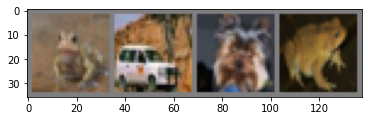

 frog   car   dog  frog


In [19]:
#Probemos a montar un código encargado de mostrar algunas imágenes

def imshow(img):
  img = img / 2 + 0.5 # desnormalización de la imágen
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

#Cogemos un conjunto de imágenes
dataiter = iter(trainloader) #generamos el iterador
images, labels = dataiter.next()

#Mostramos las imágenes
imshow(torchvision.utils.make_grid(images))
#Mostramos las labels
print(' '.join('%5s' % classes[labels[j]] for j in range(labels.size(0))))

In [20]:
# Definimos la CNN

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5) #creo que esto era equivalente a un flatten
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [21]:
#para copiar los pesos a a memoria de la GPU para realizar los cálculos,
# necesitamos esta línea de código

net.to(device)

NameError: ignored

In [22]:
#LOSS FUNCTION Y OPTIMIZADOR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
#ENTRENAMIENTO

#el comportamiento de algunas capas no es el mismo en entrenamiento o en test,
# (como por ejemplo, dropout o batch normalization), es interesante definirlo
net.train()

train_loss = []
epochs = 10
for epoch in range(epochs):

  running_loss = 0.0
  for data in trainloader: #este es el iterable que se ha construido unas celdas atrás
    # cogemos los inputas, que vienen en formato [input, label]
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    #hacemos cero los parámetros del gradiente
    # PyTorch acumula los gradientes en pasadas backward sucesivas
    optimizer.zero_grad()
    # forward + backward + optimizar
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    #el loss se devuelve como una media sobre todo el batch_size: deshacemos la media
    running_loss += loss.item() * inputs.size(0)

  loss = running_loss / len(trainloader) #media sobre el número de batches
  # esto ha servido para evitar el sesgo en el cálculo del loss para el último batch
  train_loss.append(loss)
  print('epoch [%d/%d] loss: %.3f' %
        (epoch + 1, epochs, loss))
  
print('Finished Training')

NameError: ignored

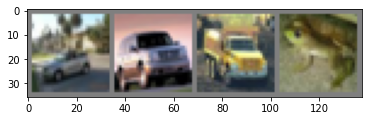

GroundTruth:    car   car truck  frog


In [24]:
#  --Veamos si nuestra CNN ha aprendido usando otro batch de imagenes--

images, labels = dataiter.next()

#printeamos las imágenes
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(labels.size(0))))

In [25]:
#  --Predicción para 4 imágenes--
images, labels = images.to(device), labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1) #CLASIFICACIÓN
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(predicted.size(0))))

NameError: ignored

In [27]:
#  --Tasa de acierto para todo el test set--

net.eval()
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10.000 test images: %d %%' % (
    100 * correct / total))

NameError: ignored

In [ ]:
# -- TASAS DE ACIERTO POR CLASE --
# Veamos qué clases se detectan mejor

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

#todo lo que está dentro del 'with' no calcula el gradiente
# es importante usarlo para no llenar la memoria de la gpu de cosas que no sirven pa na
with torch.no_grad():
  for data in testloader:
    images, labels = dataimages, labels = images.to(device), labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    #ahora no sólo nos interesa la tasa de acierto global, sino que tenemos que
    # ver además de qué clase se trata
    for i in range(labels.size(0)):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (
      classes[i], 100 * class_correct[i] / class_total[i]))